<a href="https://colab.research.google.com/github/breakdown-voltage/SpinLatticeSimulation/blob/main/Spin_Lattice_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initializing the functions

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def calc_energy(k: float, l: np.array, N: int):
    sum = 0
    for i in range(N):
        for j in range(N):
            sum += l[i][j] * (l[(i + 1) % N][j] + l[i][(j + 1) % N])
    return -k * sum


def Magnetisation(l, N):
  sum = 0
  for i in range(N):
    for j in range(N):
      sum+=l[i][j]
  return sum/N**2

def createLattice(N):
  spins = [-1, 1]
  lattice = np.ones((N, N))
  for i in range(N):
    for j in range(N):
      lattice[i][j] = np.random.choice(spins)
  return lattice

def f(x, k):
    return np.exp(-x/k)

# J values
a = np.linspace(0.1, 0.9, 9)
# KT values
b = np.linspace(0.5, 3, 100)

### Metropolis Algorithm

In [21]:
# Lattice size (NxN)
N = 5
E_all = []
M_all = []
final = []
lattice_start = createLattice(N)
start = np.copy(lattice_start)
for j in a:
  for index, i in enumerate(b):
    J = j
    E0 = calc_energy(J, lattice_start, N)
    # MC steps
    iters = 2000
    dE = 0.01
    E = []
    avgM = []
    K = i
    lattice = np.copy(lattice_start)
    mag_sum = 0
    eng_sum = 0
    for _ in range(iters):
      E.append(E0)
      mag_sum += Magnetisation(lattice, N)
      avgM.append(mag_sum / N**2)

      # Flip a single spin
      a1, b1 = int(N * np.random.rand()), int(N * np.random.rand())
      lattice[a1][b1] *= -1

      # Calculate new energy
      E1 = calc_energy(J, lattice, N)

      # Calculate acceptance probability
      delta_E = E1 - E0
      acceptance = 1 if delta_E <= 0 else np.exp(-delta_E / K)

      if np.random.rand() < acceptance:
          E0 = E1  # Accept the new configuration
      else:
          lattice[a1][b1] *= -1  # Revert the spin flip

    final.append(lattice)

    M_all.append(avgM)




### Visualizing the dependency of Average Magnetization with Temperature (KT) for different coupling values (J)

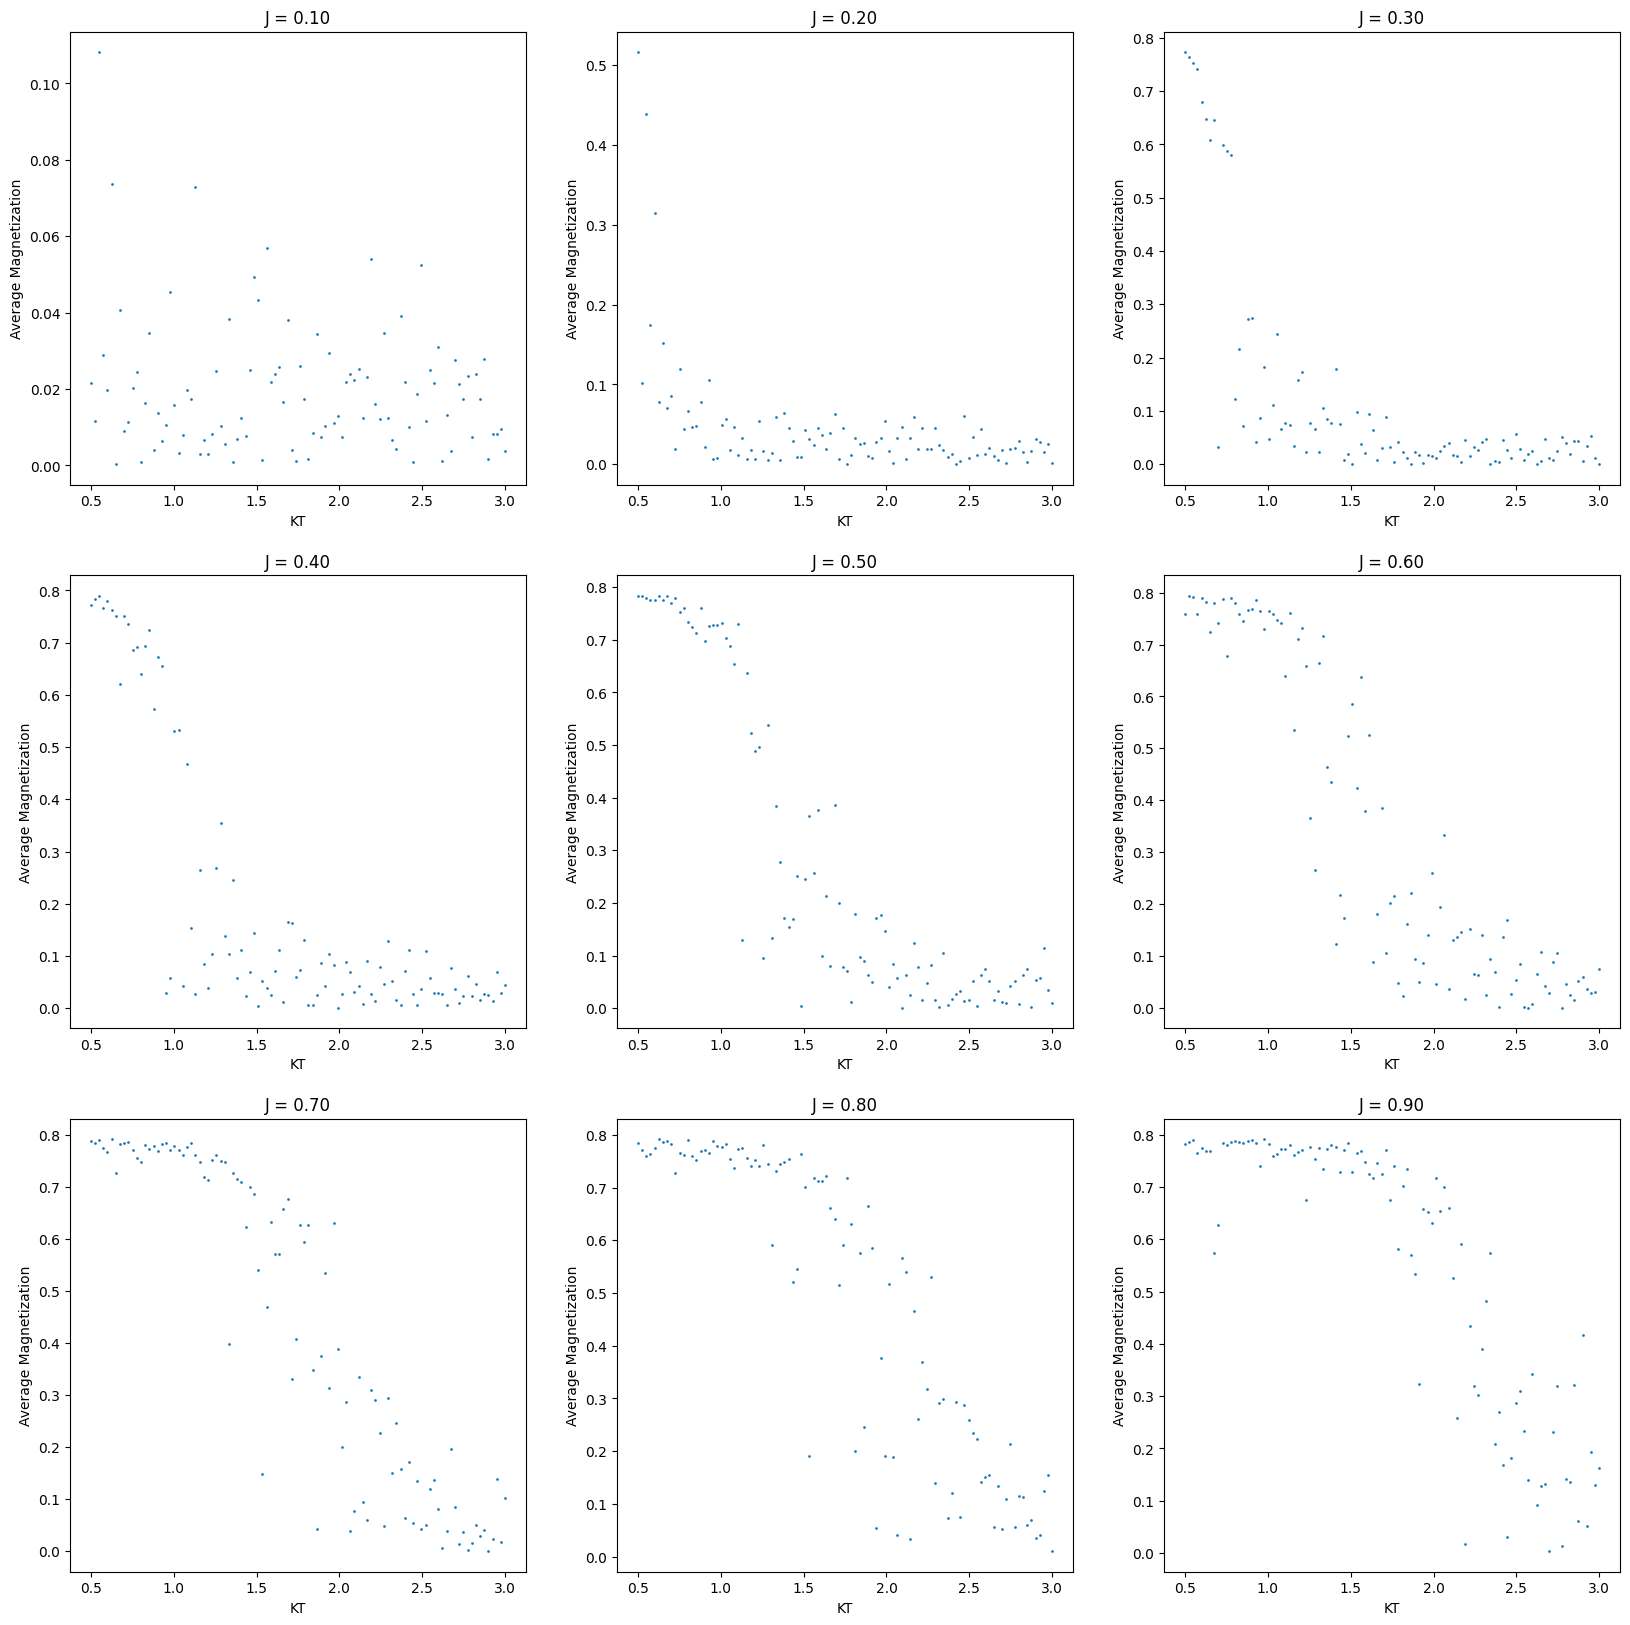

In [22]:
plt.figure(figsize=(20, 20))
end_mags = np.array([np.abs(k[-1]) for k in M_all]).reshape(9, 100)
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(f"J = {a[i]:.2f}")
  plt.scatter(b, end_mags[i, :]/100, label=f'J = {a[i]}', s=0.9)
  plt.xlabel("KT")
  plt.ylabel("Average Magnetization")

plt.show()

### Visualizing the Initial and Final Configurations at different temperatures (KT)

(-0.5, 4.5, 4.5, -0.5)

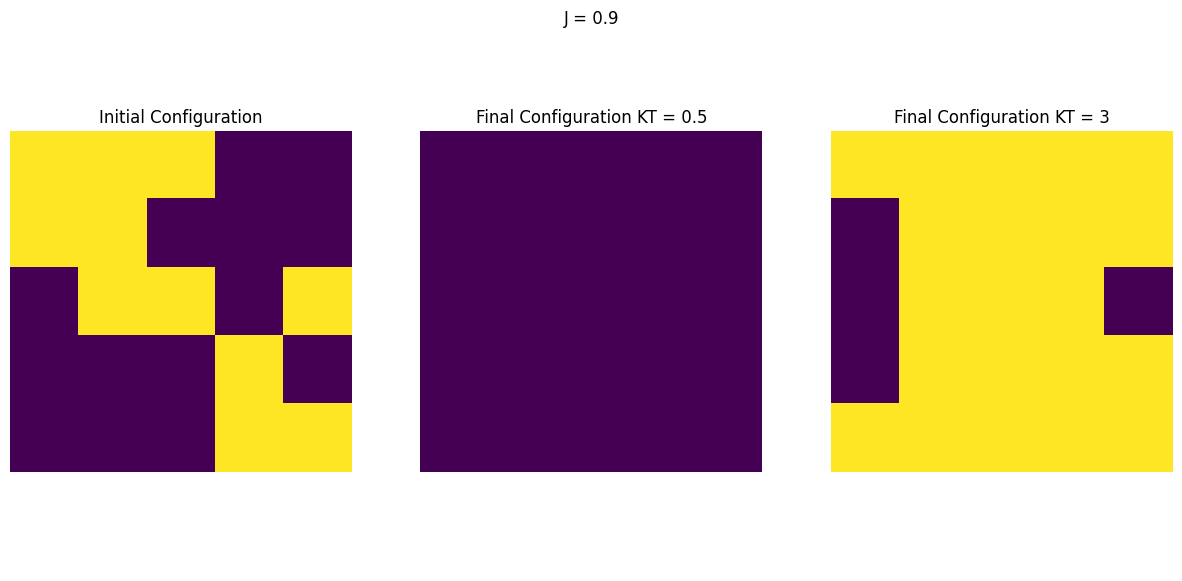

In [23]:
plt.figure(figsize=(15, 7))
plt.title("J = 0.9")
plt.axis(False)
plt.subplot(1, 3, 1)
plt.imshow(start)
plt.title("Initial Configuration")
plt.axis(False)
plt.subplot(1, 3, 2)
plt.imshow(final[-100])
plt.title("Final Configuration KT = 0.5")
plt.axis(False)
plt.subplot(1, 3, 3)
plt.imshow(final[-1])
plt.title("Final Configuration KT = 3")
plt.axis(False)
